# Facebook Staff Data Scientist Python Test

This notebook is designed to evaluate your expertise in data science, machine learning, and ML Ops for a Staff Data Scientist position at Facebook. In this test, you will work with a synthetic dataset simulating user sessions on Facebook. Your tasks include data ingestion, preprocessing, exploratory data analysis (EDA), feature engineering, model building, and model tuning. In addition, you will answer questions regarding ML Ops practices for deploying and maintaining machine learning systems in production.

Please read the instructions carefully and add your answers to the ML Ops questions in markdown cells at the end of the notebook.

## Overview

You are provided with a synthetic dataset named **`facebook_data.csv`** that simulates user sessions on Facebook. The dataset includes the following columns:

- **session_id:** Unique identifier for each session.
- **user_id:** Unique identifier for each user.
- **timestamp:** Timestamp of the session event.
- **device_type:** Device used by the user (e.g., "Desktop", "Mobile", "Tablet").
- **action:** The action performed by the user during the session (e.g., "view", "like", "comment", "share", "post").
- **time_spent:** Duration of the session in seconds.
- **content_category:** Category of the content viewed (e.g., "news", "entertainment", "sports", "technology", "lifestyle").
- **engagement:** Binary indicator (0 or 1) representing whether the session resulted in significant engagement (e.g., a like, comment, share, or post).

Your objective is to build a predictive model to estimate the likelihood of engagement based on session data.

## Dataset Generation

Run the cell below to generate the synthetic dataset and save it as **`facebook_data.csv`**.

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Number of sessions to simulate
num_sessions = 1500

# Generate unique session IDs
session_ids = np.arange(1, num_sessions + 1)

# Generate random user IDs (simulate repeated users)
user_ids = np.random.randint(1, 1000, size=num_sessions)

# Generate random timestamps within the year 2023
base_date = datetime(2023, 1, 1)
random_days = np.random.randint(0, 365, size=num_sessions)
random_seconds = np.random.randint(0, 86400, size=num_sessions)
timestamps = [base_date + timedelta(days=int(d), seconds=int(s)) for d, s in zip(random_days, random_seconds)]

# Define device types with weighted probabilities
device_types = np.random.choice(
    ['Desktop', 'Mobile', 'Tablet'],
    size=num_sessions,
    p=[0.4, 0.5, 0.1]
)

# Define possible user actions with weighted probabilities
actions = np.random.choice(
    ['view', 'like', 'comment', 'share', 'post'],
    size=num_sessions,
    p=[0.5, 0.2, 0.1, 0.1, 0.1]
)

# Generate random time spent between 10 and 600 seconds
time_spent = np.round(np.random.uniform(10, 600, size=num_sessions), 1)

# Define content categories
content_categories = np.random.choice(
    ['news', 'entertainment', 'sports', 'technology', 'lifestyle'],
    size=num_sessions
)

# Generate engagement indicator:
# - If action is one of "like", "comment", "share", or "post", then engagement = 1.
# - Otherwise ("view"), assign engagement = 1 with a 10% chance.
engagement = []
for act in actions:
    if act in ['like', 'comment', 'share', 'post']:
        engagement.append(1)
    else:  # view
        engagement.append(1 if np.random.rand() < 0.1 else 0)
engagement = np.array(engagement)

# Create the DataFrame
df = pd.DataFrame({
    'session_id': session_ids,
    'user_id': user_ids,
    'timestamp': timestamps,
    'device_type': device_types,
    'action': actions,
    'time_spent': time_spent,
    'content_category': content_categories,
    'engagement': engagement
})

# Save the dataset to a CSV file
df.to_csv('../../data/facebook_data.csv', index=False)
print("Dataset 'facebook_data.csv' generated successfully!")

Dataset 'facebook_data.csv' generated successfully!


## Task 1: Data Loading and Preprocessing

1. **Load the Data:**
   - Read the `facebook_data.csv` file into a pandas DataFrame.
   - Display the first few rows to understand the structure of the data.

2. **Data Cleaning:**
   - Check for and handle missing values and outliers.
   - Convert the `timestamp` column to a datetime object.
   - Create additional time-based features (e.g., hour of day, day of week).

In [2]:
import pandas as pd
from datetime import datetime

# Load the dataset
data = pd.read_csv('../../data/facebook_data.csv')
print("First few rows of the dataset:")
print(data.head())

# Convert timestamp to datetime and create time-based features
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['hour'] = data['timestamp'].dt.hour
data['day_of_week'] = data['timestamp'].dt.dayofweek

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Display data types
print("\nData types:")
print(data.dtypes)

First few rows of the dataset:
   session_id  user_id            timestamp device_type action  time_spent  \
0           1      103  2023-10-21 19:18:39     Desktop   post       190.8   
1           2      436  2023-06-08 02:38:23     Desktop   like       577.7   
2           3      861  2023-10-30 16:51:43     Desktop   post       579.0   
3           4      271  2023-08-16 17:52:59     Desktop   view       180.8   
4           5      107  2023-12-31 16:04:26      Tablet   view       293.0   

  content_category  engagement  
0       technology           1  
1    entertainment           1  
2       technology           1  
3        lifestyle           0  
4       technology           1  

Missing values in each column:
session_id          0
user_id             0
timestamp           0
device_type         0
action              0
time_spent          0
content_category    0
engagement          0
hour                0
day_of_week         0
dtype: int64

Data types:
session_id              

## Task 2: Exploratory Data Analysis (EDA)

1. **Summary Statistics:**
   - Compute descriptive statistics for numerical and categorical features.

2. **Visualization:**
   - Plot the distribution of key features (e.g., `time_spent`, `engagement`).
   - Visualize relationships between features (e.g., device type vs. engagement, content category vs. time spent).

Summary statistics:
        session_id      user_id                      timestamp   time_spent  \
count  1500.000000  1500.000000                           1500  1500.000000   
mean    750.500000   501.567333  2023-07-03 09:37:13.249332992   304.062000   
min       1.000000     1.000000            2023-01-01 08:15:25    10.400000   
25%     375.750000   236.000000            2023-04-05 01:34:20   163.675000   
50%     750.500000   508.000000     2023-06-29 19:22:10.500000   308.250000   
75%    1125.250000   761.000000            2023-10-05 21:34:01   445.025000   
max    1500.000000   999.000000            2023-12-31 21:44:18   599.900000   
std     433.157015   292.708283                            NaN   169.443851   

        engagement         hour  day_of_week  
count  1500.000000  1500.000000  1500.000000  
mean      0.529333    11.428667     3.026000  
min       0.000000     0.000000     0.000000  
25%       0.000000     5.000000     1.000000  
50%       1.000000    12.000000  

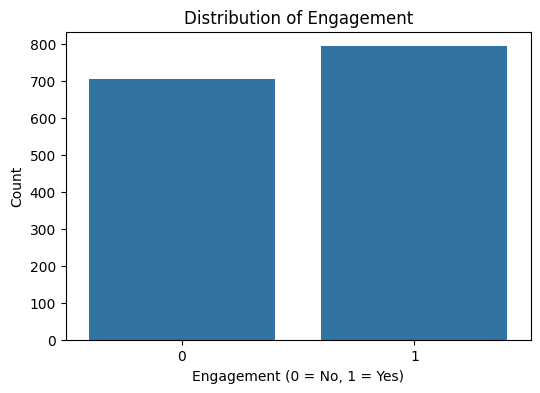

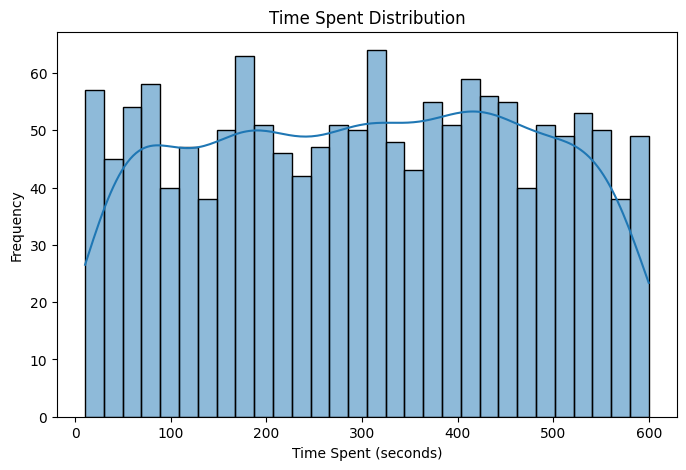

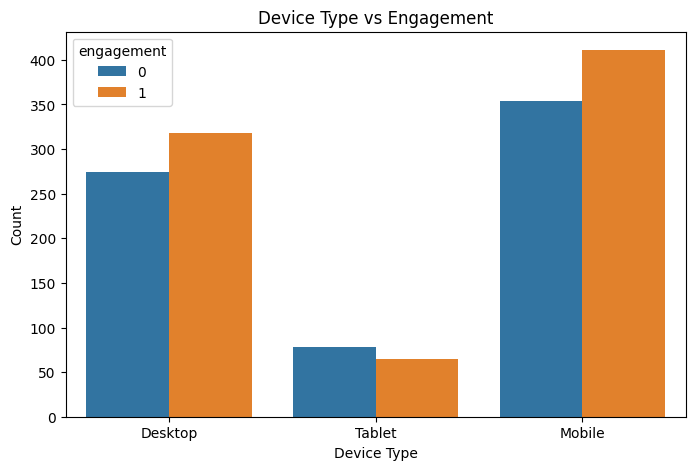

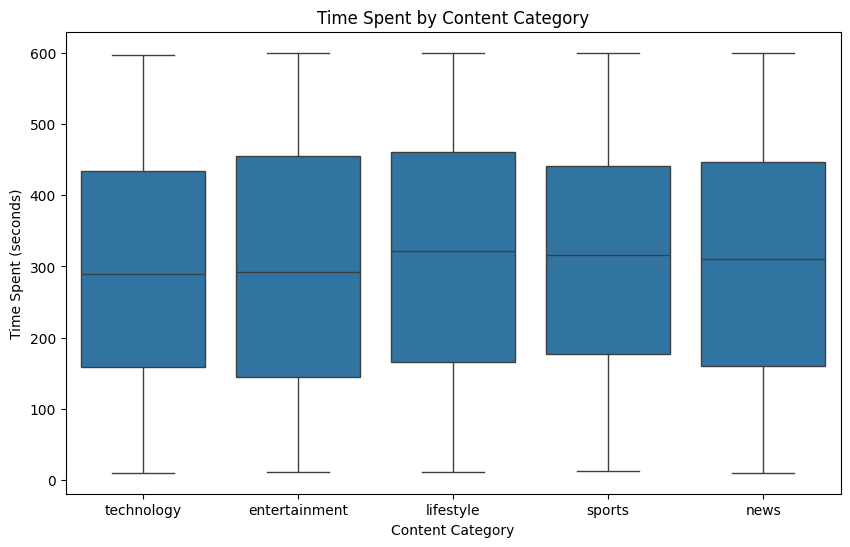

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print("Summary statistics:")
print(data.describe())

# Distribution of engagement
plt.figure(figsize=(6,4))
sns.countplot(x='engagement', data=data)
plt.title("Distribution of Engagement")
plt.xlabel("Engagement (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Distribution of time_spent
plt.figure(figsize=(8,5))
sns.histplot(data['time_spent'], bins=30, kde=True)
plt.title("Time Spent Distribution")
plt.xlabel("Time Spent (seconds)")
plt.ylabel("Frequency")
plt.show()

# Device type vs engagement
plt.figure(figsize=(8,5))
sns.countplot(x='device_type', hue='engagement', data=data)
plt.title("Device Type vs Engagement")
plt.xlabel("Device Type")
plt.ylabel("Count")
plt.show()

# Content category vs time spent
plt.figure(figsize=(10,6))
sns.boxplot(x='content_category', y='time_spent', data=data)
plt.title("Time Spent by Content Category")
plt.xlabel("Content Category")
plt.ylabel("Time Spent (seconds)")
plt.show()

## Task 3: Feature Engineering

1. **Categorical Variables:**
   - Encode categorical variables (e.g., `device_type`, `action`, `content_category`) using one-hot encoding or an appropriate method.

2. **Additional Features:**
   - Create new features if applicable (e.g., aggregated user behavior metrics or additional time-based segments).

In [4]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=['device_type', 'action', 'content_category'], drop_first=True)
print("Columns after one-hot encoding:")
print(data_encoded.columns)

Columns after one-hot encoding:
Index(['session_id', 'user_id', 'timestamp', 'time_spent', 'engagement',
       'hour', 'day_of_week', 'device_type_Mobile', 'device_type_Tablet',
       'action_like', 'action_post', 'action_share', 'action_view',
       'content_category_lifestyle', 'content_category_news',
       'content_category_sports', 'content_category_technology'],
      dtype='object')


## Task 4: Model Building

1. **Train-Test Split:**
   - Split the dataset into training and testing sets.

2. **Model Selection:**
   - Build at least one classification model (e.g., Logistic Regression, Random Forest, or XGBoost) to predict the likelihood of engagement.
   - Train your model on the training set.

3. **Evaluation:**
   - Evaluate your model using metrics such as accuracy, ROC AUC, precision, recall, and F1 score.
   - Provide a confusion matrix and a classification report.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Define features (X) and target (y). Drop columns that are identifiers or not needed.
X = data_encoded.drop(columns=['engagement', 'session_id', 'user_id', 'timestamp'])
y = data_encoded['engagement']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.96
ROC AUC Score: 0.9665296535525543

Confusion Matrix:
[[131   0]
 [ 12 157]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       131
           1       1.00      0.93      0.96       169

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



## Task 5: Model Tuning and Evaluation

1. **Hyperparameter Tuning:**
   - Use cross-validation and GridSearchCV (or a similar approach) to optimize your model’s hyperparameters.
   - Report the best hyperparameter settings and performance metrics.

2. **Feature Importance:**
   - Identify and visualize the most important features influencing your model’s predictions.

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validated ROC AUC: 0.9634226086956522

Best Model Accuracy: 0.96
Best Model ROC AUC Score: 0.9682912507339988


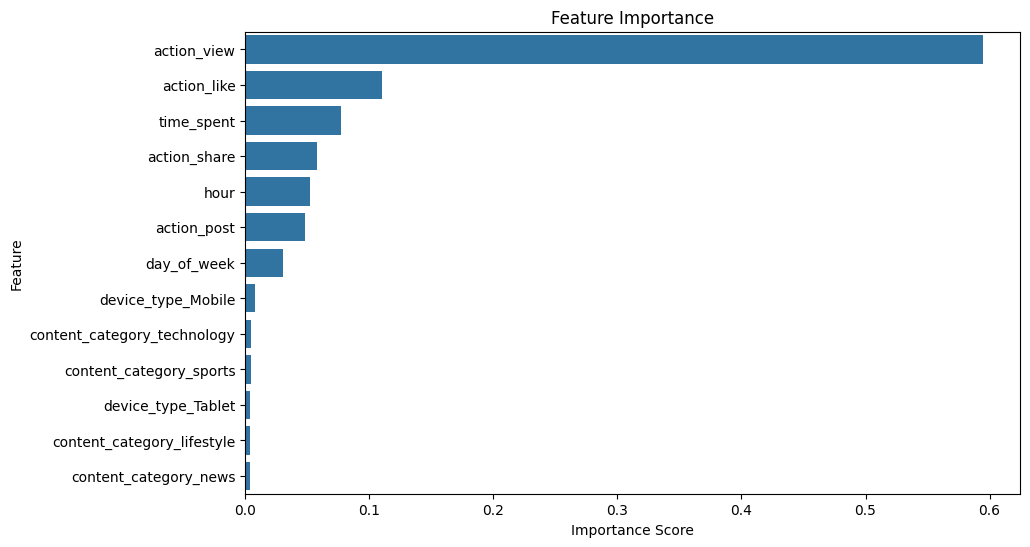

In [6]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Set up GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
                           param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated ROC AUC:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\nBest Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model ROC AUC Score:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))

# Plot feature importances
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importances = best_model.feature_importances_
features = X.columns
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

## Task 6: ML Ops and Production Readiness

Answer the following questions in your submission. Provide written explanations and, where applicable, code snippets or diagrams:

1. **Model Deployment:**
   - How would you deploy your trained model in a production environment (e.g., using REST APIs, containerization)?
   - Which platforms or tools would you use (e.g., AWS SageMaker, Docker, Kubernetes) and why?

2. **Monitoring and Logging:**
   - Describe how you would monitor the model's performance and detect data drift over time.
   - What logging and alerting mechanisms would you implement?

3. **CI/CD Pipeline for ML:**
   - Outline your strategy for setting up a continuous integration and deployment (CI/CD) pipeline for machine learning models.
   - Mention specific tools or practices (e.g., model versioning, automated testing, rollback mechanisms).

4. **Scalability and Maintenance:**
   - How would you ensure that your model scales to handle high volumes of data and prediction requests?
   - Discuss strategies for model retraining and versioning in response to evolving data.

*(Please provide your detailed answers as additional markdown cells in your submission.)*

# ML Ops and Production Readiness: Answers

Below are detailed responses to the ML Ops questions:

---

### 1. Model Deployment

**Approach:**
- **Containerization:** I would containerize the trained model using Docker to ensure consistency between development and production environments. This allows the model to be packaged with all its dependencies.
- **API Serving:** Deploy the container as a REST API using frameworks like Flask or FastAPI. This provides a simple endpoint for real-time predictions.
- **Orchestration and Scaling:** For production, I would deploy the containerized model on a managed Kubernetes cluster (e.g., AWS EKS, GCP GKE, or Azure AKS) to handle scaling, load balancing, and fault tolerance.
- **Managed Services:** Alternatively, I might leverage a managed service like AWS SageMaker Endpoints for model serving, which abstracts away many operational complexities.

**Rationale:**  
Using containerization and orchestration tools ensures that the model can scale dynamically with user traffic while maintaining high availability and easy updates.

---

### 2. Monitoring and Logging

**Monitoring Strategy:**
- **Performance Metrics:** I would monitor key metrics such as request latency, throughput, error rates, and model-specific metrics (e.g., prediction confidence, distribution of input features).
- **Drift Detection:** Implement statistical tests or use tools (e.g., Evidently AI) to compare the live data distribution with the training data, thereby detecting data drift.

**Logging and Alerting:**
- **Centralized Logging:** Use centralized logging systems like the ELK Stack (Elasticsearch, Logstash, Kibana) or cloud-native solutions (e.g., AWS CloudWatch) to capture logs from the model server.
- **Alerting Mechanisms:** Set up alerting via Prometheus with Alertmanager or cloud-based alerts that notify the team via email or messaging platforms (e.g., Slack) when anomalies are detected.

**Rationale:**  
A robust monitoring system is essential to promptly detect and address issues in production, ensuring that the model remains reliable and performs as expected over time.

---

### 3. CI/CD Pipeline for ML

**CI/CD Strategy:**
- **Version Control and Automated Testing:** Integrate the model code and training scripts with Git and set up automated testing (e.g., unit tests, integration tests) using GitHub Actions, Jenkins, or GitLab CI/CD.
- **Model Versioning:** Use tools such as MLflow or DVC to track experiments, manage model artifacts, and version deployed models.
- **Container Build and Deployment:** Automate the process of building Docker images and deploying them to a staging environment using Kubernetes or managed services like AWS SageMaker.
- **Rollback Mechanisms:** Implement rollback strategies so that if a new model version underperforms, the system can automatically revert to a previously stable version.

**Rationale:**  
Automating the CI/CD pipeline minimizes human error, ensures reproducibility, and allows for rapid iteration and deployment of model updates.

---

### 4. Scalability and Maintenance

**Scalability:**
- **Auto-scaling Infrastructure:** Utilize Kubernetes’ horizontal pod autoscaling to dynamically adjust the number of deployed containers based on the load.
- **Load Balancing:** Implement load balancing to distribute prediction requests evenly across multiple instances, ensuring efficient utilization of resources.

**Maintenance and Retraining:**
- **Scheduled Retraining:** Set up periodic retraining pipelines triggered by data drift alerts or scheduled intervals (e.g., weekly or monthly retraining) to keep the model current.
- **Continuous Monitoring:** Regularly monitor performance metrics to identify degradation, which could trigger retraining or model updates.
- **Model Versioning:** Maintain a history of model versions to enable A/B testing and facilitate smooth transitions between model updates.

**Rationale:**  
Ensuring scalability and continuous maintenance of the model is key to handling high volumes of data and evolving user behavior, which is critical in a dynamic production environment like Facebook.

---

*These answers reflect a comprehensive strategy for deploying, monitoring, and maintaining machine learning models in production, ensuring that the system is robust, scalable, and continuously improved based on live data and performance metrics.*


## Submission Instructions

- Provide your Python code in this notebook.
- Include your answers to the ML Ops questions in markdown cells within this notebook or attach supplementary documentation if needed.
- Ensure that your code is well-commented and organized, and that visualizations and outputs are clearly labeled.
- Submit your notebook along with any supplementary documentation (e.g., diagrams for CI/CD pipelines) that supports your solutions.

*Good luck, and we look forward to reviewing your submission!*